# Pandemic Journaling Project
## Thomas Rosenthal
### Assignment 3: INF2199

**Prereqs**

*You need wordcloud for this notebook*

In [ ]:
#pip install wordcloud
pass

*You need langdetect for this notebook*

In [ ]:
#pip install langdetect
pass

*You need plotly.express for this notebook*

In [ ]:
#pip install plotly.express
pass

_You need textblob for this notebook_

In [ ]:
#pip install textblob
pass

_You need to download nltk's resources and place it within your wd (or root)_

In [ ]:
#nltk.download()
#nltk.download('wordnet')
pass

## Introduction

An intro

### Data Preparation

In [185]:
#import libraries
import os
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from langdetect import detect 

import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer


from textblob import TextBlob

%matplotlib inline

**Scraped Data**

The Pandemic Journaling Project has not yet made its data available. Using R, we can scrape the "Featured" stories (see §Appendix) in order to create our dataframe. As of April 2, 2021 there are 1117 journal entries. 

In [2]:
raw = pd.read_csv('data/PandemicJournalingProject_20210402.csv')

In [3]:
raw.head()

rowname                  ids  \
0        1  journal-entry-12333   
1        2  journal-entry-12329   
2        3   journal-entry-1909   
3        4   journal-entry-1628   
4        5  journal-entry-12110   

                                             entries  
0   It's still the pandemic, although the Chauvin...  
1   I found out I was pregnant ( a surprise) in J...  
2  Bueno, me he dado cuenta que  me he vuelto un ...  
3   Antes de la pandemia, eramos otras personas.\...  
4  Only twice in the past year has any stranger a...

### Wrangling

In [70]:
#remove spanish entries
raw['lang'] = raw['entries'].apply(lambda x: detect(x) == 'en')
eng = raw.loc[raw.lang, :]

In [71]:
#turn ids like "journal-entry-12333" into an id field (12333) to sort on
eng[['del','del1', 'id']] =eng['ids'].str.split('-', expand = True)
del eng['del']
del eng['del1']
eng["id"] = eng["id"].astype(str).astype(int)
#move to front of dataframe
col = eng.pop("id")
eng.insert(0, col.name, col)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [72]:
#remove unnecessary columns
del eng['rowname']
del eng['lang']

In [73]:
eng.head()

id                  ids  \
0  12333  journal-entry-12333   
1  12329  journal-entry-12329   
4  12110  journal-entry-12110   
5  12147  journal-entry-12147   
6  12093  journal-entry-12093   

                                             entries  
0   It's still the pandemic, although the Chauvin...  
1   I found out I was pregnant ( a surprise) in J...  
4  Only twice in the past year has any stranger a...  
5  Sitting on quite a lot of anger and something ...  
6   The pandemic doesn't feel real anymore. That ...

### Word Cloud

An interesting start with NLP is a world cloud. 

In [74]:
text = " ".join(i for i in eng.entries)

In [247]:
#https://github.com/stopwords-iso/stopwords-en/blob/master/stopwords-en.txt
words = []
for word in open('data/stopwords.txt'):
    words.append(word.rstrip('\n'))

In [248]:
stopwords = set(words)

In [77]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

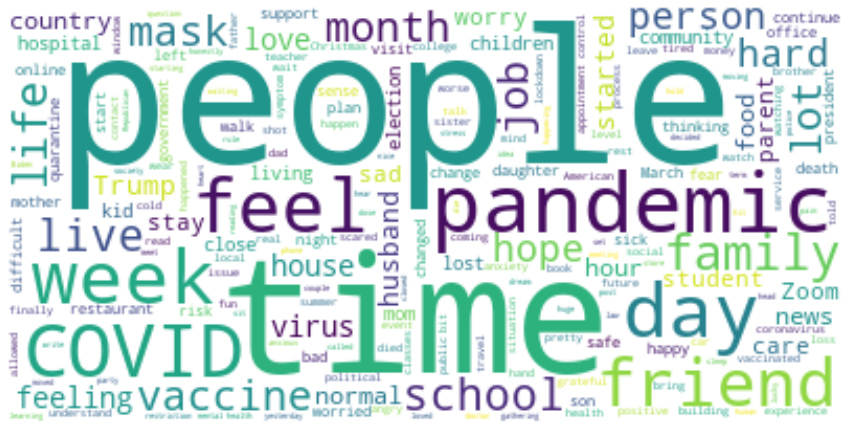

In [78]:
plt.figure(figsize=[15,15])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Frequency of Words

In [256]:
eng['tokenized'] = eng['entries'].apply(word_tokenize)
text = eng['entries'].apply(word_tokenize)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [257]:
#if you're thinking about stemming/lemmatizing
#this code workds, but I saw too many stop words even afte lemmatizing the stoplist, so went without


# lemmatizer = nltk.stem.WordNetLemmatizer()
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# def lemmatize_text(entries):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(entries)]
# eng['text_lemmatized'] = eng.entries.apply(lemmatize_text)
# text = eng['text_lemmatized']
# stop_words = [[lemmatizer.lemmatize(word) for word in word_tokenize(s)]
#               for s in stopwords]


In [258]:
words = sum(text, [])
words = [w for w in words if w.isalpha()]
words = [w for w in words if w.lower() not in stopwords]
#words = [w for w in words if w.lower() not in stop_words]

In [260]:
fd = nltk.FreqDist(words)
frequency = pd.DataFrame(list(fd.items()), columns = ["word","frequency"]) 
frequency.sort_values(by=['frequency'], ascending=False).head(10)

word  frequency
107    people        886
0    pandemic        646
174      time        534
115      feel        414
249      week        396
662       day        328
9     friends        321
10     family        320
756     COVID        261
228      life        261

**Bigrams/Triagrams**

In [82]:
finder = nltk.collocations.BigramCollocationFinder.from_words(words)
finder.ngram_fd.most_common(8)

[(('mental', 'health'), 41),
 (('friends', 'family'), 34),
 (('health', 'care'), 34),
 (('social', 'distancing'), 32),
 (('wear', 'masks'), 30),
 (('wear', 'mask'), 28),
 (('family', 'friends'), 28),
 (('social', 'media'), 28)]

In [25]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(words)
finder.ngram_fd.most_common(8)

[(('health', 'care', 'workers'), 7),
 (('Black', 'Lives', 'Matter'), 7),
 (('universal', 'health', 'care'), 6),
 (('Fluttering', 'cold', 'breeze'), 5),
 (('cold', 'breeze', 'dances'), 5),
 (('breeze', 'dances', 'skin'), 5),
 (('Pandemic', 'Journaling', 'Project'), 4),
 (('health', 'care', 'worker'), 4)]

### Sentiment Analysis

In [26]:
text = " ".join(i for i in eng.entries)
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text)

{'neg': 0.088, 'neu': 0.819, 'pos': 0.093, 'compound': 1.0}

In [27]:
sia.polarity_scores(eng.entries[0])

{'neg': 0.044, 'neu': 0.829, 'pos': 0.127, 'compound': 0.8591}

In [30]:
tokenized_sentence = eng.tokenized[0]

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)

print('Positive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list) 
score = sid.polarity_scores(eng.entries[0])
print('\nScores:', score)

Positive: ['friends', 'care', 'best', 'mercy']
Neutral: ['It', "'s", 'still', 'the', 'pandemic', ',', 'although', 'the', 'Chauvin', 'trial', 'is', 'a', 'close', 'second', '.', 'The', 'pandemic', 'surge', 'is', 'happening', ',', 'AGAIN', '.', 'I', 'for', 'America', 'and', 'the', 'rest', 'of', 'the', 'world', '.', 'I', 'have', 'and', 'family', 'in', 'Europe', ',', 'where', 'they', 'are', 'again', 'in', 'lockdown', '.', 'I', 'hear', 'news', 'reports', 'of', 'vaccine', 'refusers', '(', 'even', 'health', 'workers', ')', 'in', 'Africa', '.', 'Vaccine', 'supply', 'is', 'spotty', 'at', 'in', 'the', 'rest', 'of', 'the', 'world', ',', 'and', 'those', 'in', 'rural', ',', 'underdeveloped', 'countries', 'are', 'at', 'the', 'of', 'their', 'governments', '.', 'This', 'is', 'a', 'virus', 'that', 'keeps', 'mutating', '.', 'I', 'it', 'will', 'be', 'the', 'main', 'news', 'story', 'for', 'years', '.']
Negative: ['despair', 'suspect']

Scores: {'neg': 0.044, 'neu': 0.829, 'pos': 0.127, 'compound': 0.8591}


In [35]:
analysis = TextBlob(eng.entries[0])
print(analysis.sentiment)  # print  polarity

Sentiment(polarity=0.2916666666666667, subjectivity=0.15833333333333333)


In [86]:
ind_eng = eng.reset_index(drop=True)

In [87]:
#add polarity to dataframe as a column 
#graph over time (binned) 
polarity = 0
pol = []
for i in ind_eng.index:
    analysis = TextBlob(ind_eng.entries[i])
    
    polarity = analysis.sentiment.polarity
    pol.append(polarity)
    
se = pd.Series(pol)
ind_eng['polarity'] = se.values

In [88]:
ind_eng.head()

id                  ids  \
0  12333  journal-entry-12333   
1  12329  journal-entry-12329   
2  12110  journal-entry-12110   
3  12147  journal-entry-12147   
4  12093  journal-entry-12093   

                                             entries  \
0   It's still the pandemic, although the Chauvin...   
1   I found out I was pregnant ( a surprise) in J...   
2  Only twice in the past year has any stranger a...   
3  Sitting on quite a lot of anger and something ...   
4   The pandemic doesn't feel real anymore. That ...   

                                           tokenized  polarity  
0  [It, 's, still, the, pandemic, ,, although, th...  0.291667  
1  [I, found, out, I, was, pregnant, (, a, surpri...  0.023316  
2  [Only, twice, in, the, past, year, has, any, s... -0.180000  
3  [Sitting, on, quite, a, lot, of, anger, and, s... -0.034802  
4  [The, pandemic, does, n't, feel, real, anymore... -0.018750

In [89]:
# for i in ind_eng.index:
#     if ind_eng.loc[i, 'polarity'] == 0:
#         ind_eng['label'] = 'netrual'
#     elif 0 < ind_eng.loc[i, 'polarity'] <= 0.2:
#         ind_eng['label'] = 'wpositive'         
#     elif 0.2 < ind_eng.loc[i, 'polarity'] <= 0.4:
#         ind_eng['label'] = 'positive'    
#     elif 0.4 < ind_eng.loc[i, 'polarity'] <= 1:
#         ind_eng['label'] = 'spositive'
#     elif -0.2 < ind_eng.loc[i, 'polarity'] <= 0:
#         ind_eng['label'] = 'wnegative'
#     elif -0.7 < ind_eng.loc[i, 'polarity'] <= -0.2:
#         ind_eng['label'] = 'negative'
#     elif -1 < ind_eng.loc[i, 'polarity'] <= -0.7:
#         ind_eng['label'] = 'snegative'
     


In [107]:
polarity = 0
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0
for i in ind_eng.index:
    analysis = TextBlob(ind_eng.entries[i])
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.2):
        wpositive += 1
    elif (analysis.sentiment.polarity > 0.2 and analysis.sentiment.polarity <= 0.4):
        positive += 1
    elif (analysis.sentiment.polarity > 0.4 and analysis.sentiment.polarity <= 1):
        spositive += 1
    elif (analysis.sentiment.polarity > -0.2 and analysis.sentiment.polarity <= 0):
        wnegative += 1
    elif (analysis.sentiment.polarity > -0.7 and analysis.sentiment.polarity <= -0.2):
        negative += 1
    elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.7):
        snegative += 1

positive = (positive / len(ind_eng))
wpositive = (wpositive / len(ind_eng))
spositive = (spositive / len(ind_eng))
negative = (negative / len(ind_eng))
wnegative = (wnegative / len(ind_eng))
snegative = (snegative / len(ind_eng))
neutral = (neutral / len(ind_eng))
        
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")



Detailed Report: 
0.15139442231075698% people thought it was positive
0.5577689243027888% people thought it was weakly positive
0.02390438247011952% people thought it was strongly positive
0.03286852589641434% people thought it was negative
0.21912350597609562% people thought it was weakly negative
0.00199203187250996% people thought it was strongly negative
0.012948207171314742% people thought it was neutral


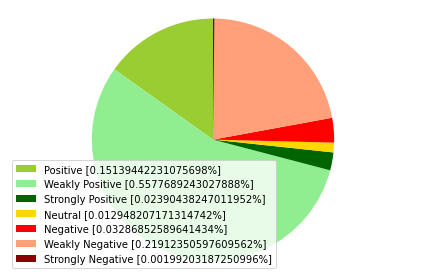

In [108]:
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
      'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
      'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]',
      'Strongly Negative [' + str(snegative) + '%]']
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Usage Over Time

In [90]:
ind_eng_sort = ind_eng.sort_values(by=['id']).reset_index(drop = True)

In [91]:
#we don't have a great way of figuring out when posts were made 
#(the date isn't given to us anywhere and wasn't something I could scrape)
#the first entries reference George Floyd's murder: May 25, 2020
#it's been approximately 45 weeks since then 
#there were also 45 pages, so 1 page per week isn't a bad guess
#we'll put these in groups and then bucket them as "weeks"
#and it shows a bit of accuracy -- "Capitol" is bucketed in the Jan 9th group -- 3 days after the riot

n_groups = 45
group = []
adj = []
for i in ind_eng_sort.index:
    l = round(len(ind_eng_sort)/n_groups)
    g = round(i/l)
    group.append(g)
    adj.append(abs(g - n_groups))

ind_eng_sort['group'] = group
ind_eng_sort['adj_group'] = adj

In [97]:
#generate the week buckets
rundate = pd.Timestamp('2021-04-03 15:34:41.258012') #my "today", don't move unless reruning (inc scraping)
ind_eng_sort['date'] = rundate - pd.to_timedelta(ind_eng_sort['adj_group'], unit='w')

In [99]:
ind_eng_sort.iloc[np.r_[0:3, -3:0]]

id                  ids  \
0         9      journal-entry-9   
1        19     journal-entry-19   
2        31     journal-entry-31   
1001  12172  journal-entry-12172   
1002  12329  journal-entry-12329   
1003  12333  journal-entry-12333   

                                                entries  \
0     After the brutal murder of George Floyd by the...   
1     Today is day 87 since I began quarantine. Phil...   
2     We are going to be in this thing for a really ...   
1001   Welcome to the fourth wave. Further evidence ...   
1002   I found out I was pregnant ( a surprise) in J...   
1003   It's still the pandemic, although the Chauvin...   

                                              tokenized  polarity  group  \
0     [After, the, brutal, murder, of, George, Floyd...  0.077679      0   
1     [Today, is, day, 87, since, I, began, quaranti... -0.055556      0   
2     [We, are, going, to, be, in, this, thing, for,...  0.314583      0   
1001  [Welcome, to, the, fourth, wave, ., Further, e...  0.083333     46   
1002  [I, found, out, I, was, pregnant, (, a, surpri...  0.023316     46   
1003  [It, 's, still, the, pandemic, ,, although, th...  0.291667     46   

      adj_group                       date  
0            45 2020-05-23 15:34:41.258012  
1            45 2020-05-23 15:34:41.258012  
2            45 2020-05-23 15:34:41.258012  
1001          1 2021-03-27 15:34:41.258012  
1002          1 2021-03-27 15:34:41.258012  
1003          1 2021-03-27 15:34:41.258012

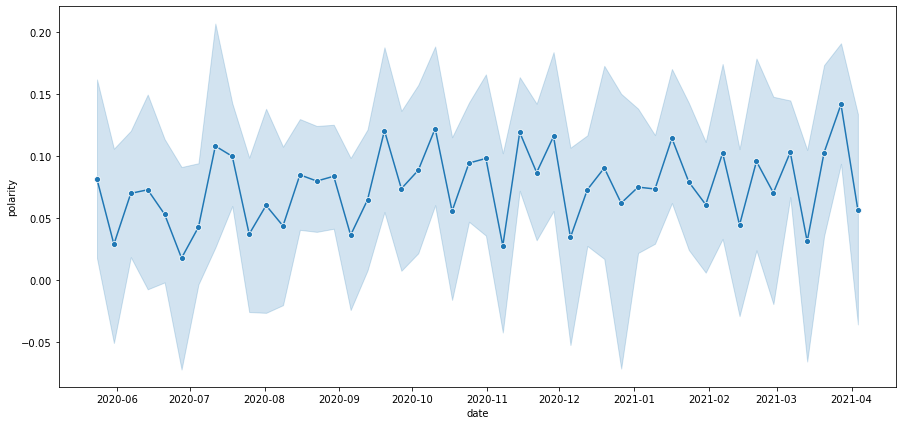

In [101]:
#prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

#setup the plot
sns.lineplot(ax = ax, y="polarity", x="date", data=ind_eng_sort, marker= 'o')

plt.show()

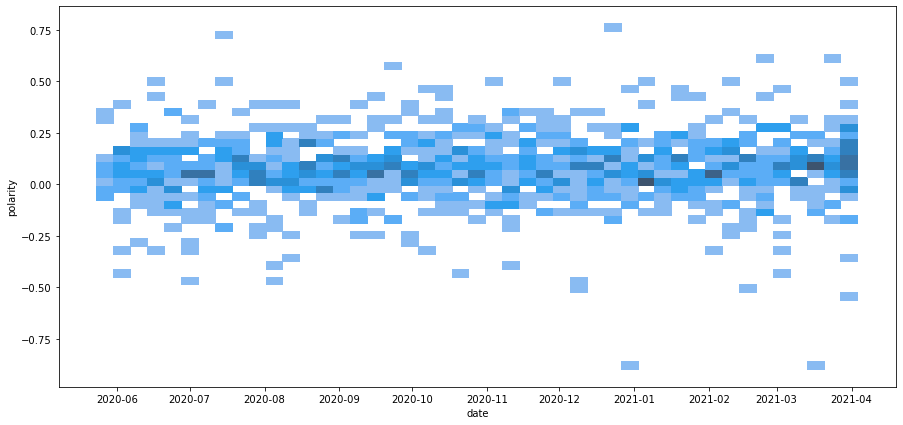

In [128]:
#prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

#setup the plot
sns.histplot(ax = ax, x="date",y='polarity', data=ind_eng_sort,bins = 45)

plt.show()

In [109]:
#create frequency within each week grouping
freq_grouped = pd.DataFrame()
for i in range(min(ind_eng_sort['group']),max(ind_eng_sort['group'])):
    text = ind_eng_sort.query("group == @i")['entries'].apply(word_tokenize)
    words = sum(text, [])
    words = [w for w in words if w.isalpha()]
    words = [w for w in words if w.lower() not in stopwords]
    fd = nltk.FreqDist(words)
    freq = pd.DataFrame(list(fd.items()), columns = ['word','frequency'])
    freq['group'] = i
    freq_grouped = freq_grouped.append(freq)

In [110]:
#bring the date back in, get's lost in the frequency grouping, easier to just join it back in
freq_grouped = pd.merge(freq_grouped,ind_eng_sort[['group', 'date']],on='group', how='inner').drop_duplicates()

In [111]:
freq_grouped.iloc[np.r_[0:3, -3:0]]

word  frequency  group                       date
0          brutal          1      0 2020-05-23 15:34:41.258012
12         murder          1      0 2020-05-23 15:34:41.258012
24         George          2      0 2020-05-23 15:34:41.258012
807524   threaten          1     45 2021-04-03 15:34:41.258012
807545  frightens          1     45 2021-04-03 15:34:41.258012
807566   progress          1     45 2021-04-03 15:34:41.258012

In [285]:
freq_grouped.sort_values(by=['frequency'], ascending= False).head(5)

word  frequency  group                       date
505526   Trump         36     29 2020-12-12 15:34:41.258012
658701    love         28     36 2021-01-30 15:34:41.258012
18533   people         28      2 2020-06-06 15:34:41.258012
608487  people         28     34 2021-01-16 15:34:41.258012
747261  people         27     42 2021-03-13 15:34:41.258012

In [124]:
#top n words per group
n = 3
x = freq_grouped.groupby('group').apply(lambda x : x.sort_values(by = 'frequency', ascending = False).head(n).reset_index(drop = True))

<AxesSubplot:xlabel='date', ylabel='frequency'>

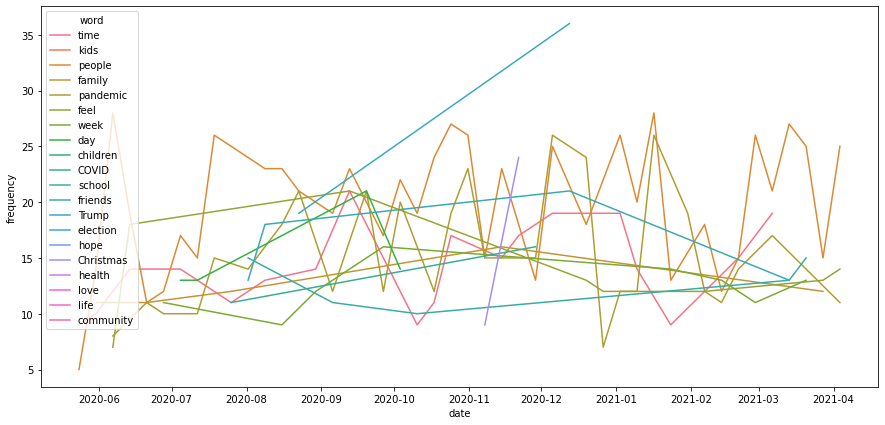

In [125]:
fig, ax = plt.subplots(figsize = (15, 7))

#setup the plot
sns.lineplot(ax = ax, x="date",y='frequency', hue = 'word' , data=x)

In [288]:
words_of_interest = ['normal','worry','hope','pandemic','family','vaccine','risk','lost','feel','kids','Trump']

#annotation at the beginning of the line 
#use the "xanchor": "right" so that the labels stick to the right side of the plot area
annotation_normal = \
[{"xref":"paper", "x":1, "y":14,
   "xanchor":"left", "yanchor":"middle",
   "text":'normal',
   "font":dict(family='Arial', size=15, color="#60BDF0"),
   "showarrow":False},]

annotation_worry = \
[{"xref":"paper", "x":1, "y":10,
  "xanchor":'left', "yanchor":'middle',
  "text":'worry',
  "font":dict(family='Arial',size=15,color="#9AC3D9"),
  "showarrow":False}]

annotation_hope = \
[{"xref":"paper", "x":1, "y":15,
  "xanchor":'left', "yanchor":'middle',
  "text":'hope',
  "font":dict(family='Arial',size=15,color="#5FAED9"),
  "showarrow":False}]

annotation_pandemic = \
[{"xref":"paper", "x":1, "y":26,
  "xanchor":'left', "yanchor":'middle',
  "text":'pandemic',
  "font":dict(family='Arial',size=15,color="#006AA3"),
  "showarrow":False}]

annotation_family = \
[{"xref":"paper", "x":1, "y":16,
  "xanchor":'left', "yanchor":'middle',
  "text":'family',
  "font":dict(family='Arial',size=15,color="#74AFCF"),
  "showarrow":False}]

annotation_vaccine = \
[{"xref":"paper", "x":1, "y":16,
  "xanchor":'left', "yanchor":'middle',
  "text":'vaccine',
  "font":dict(family='Arial',size=15,color="#656CBA"),
  "showarrow":False}]

annotation_risk = \
[{"xref":"paper", "x":1, "y":5,
  "xanchor":'left', "yanchor":'middle',
  "text":'risk',
  "font":dict(family='Arial',size=15,color="#2B317A"),
  "showarrow":False}]

annotation_lost = \
[{"xref":"paper", "x":1, "y":7,
  "xanchor":'left', "yanchor":'middle',
  "text":'lost',
  "font":dict(family='Arial',size=15,color="#080C3D"),
  "showarrow":False}]

annotation_feel = \
[{"xref":"paper", "x":1, "y":21,
  "xanchor":'left', "yanchor":'middle',
  "text":'feel',
  "font":dict(family='Arial',size=15,color="#111A7D"),
  "showarrow":False}]

annotation_school = \
[{"xref":"paper", "x":1, "y":15,
  "xanchor":'left', "yanchor":'middle',
  "text":'school',
  "font":dict(family='Arial',size=15,color="#222657"),
  "showarrow":False}]

annotation_Trump = \
[{"xref":"paper", "x":1, "y":36,
  "xanchor":'left', "yanchor":'middle',
  "text":'Trump',
  "font":dict(family='Arial',size=15,color="black"),
  "showarrow":False}]


In [289]:
#let's make this interactive instead
#sort the dataframe so the lines don't overlap
sorted_df = freq_grouped.query('frequency > 2').copy() #map the value order
sorted_df["order"] = sorted_df["word"].map({'normal':1,'worry':2,'hope':3,'pandemic':4,'family':5,
   'vaccine':6,'risk':7,'lost':8,'feel':9,'school':10,'Trump':11}).fillna(12) #sort by this order
sorted_df.sort_values(by=["order","group"], ascending=False, inplace=True)

fig = px.line(sorted_df, x="date", y="frequency", color="word",
              line_group="word", line_shape="spline", render_mode="svg")

#for the interactivity we need to know which traces belong to each word
traces = {}
for i,d in enumerate(fig.to_dict()["data"]):
    traces[d["legendgroup"]] = i
        
#make every other word light grey
fig.update_traces({"line":{"color":"lightgrey"}})

#fig aesthetics
fig.update_layout(title="Frequent Words Over Time",
                #remove the legend
                showlegend=False,                                          
                #create big enough margins for our annotations
                margin={"l":50, "r": 100},
                 
    #buttons
    updatemenus=[
        dict(buttons=list([
                dict(args=[{"line.color":["#60BDF0"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: normal",
                           "annotations": annotation_normal}, [traces["normal"]]],    
                    #args2 used as toggle button, applies when clicked on active button
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}], label="normal",method="update",)
                ,dict(args=[{"line.color":["#9AC3D9"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: worry",
                          "annotations": annotation_worry}, [traces["worry"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="worry",method="update",)
                ,dict(args=[{"line.color":["#5FAED9"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: hope",
                          "annotations": annotation_hope}, [traces["hope"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="hope",method="update",)
                ,dict(args=[{"line.color":["#006AA3"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: pandemic",
                          "annotations": annotation_pandemic}, [traces["pandemic"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}], label="pandemic",method="update",)          
                ,dict(args=[{"line.color":["#74AFCF"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: family",
                          "annotations": annotation_family}, [traces["family"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="family",method="update",)
                ,dict(args=[{"line.color":["#656CBA"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: vaccine",
                          "annotations": annotation_vaccine}, [traces["vaccine"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="vaccine",method="update",)
                ,dict(args=[{"line.color":["#2B317A"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: risk",
                          "annotations": annotation_risk}, [traces["risk"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="risk",method="update",)
                ,dict(args=[{"line.color":["#080C3D"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: lost",
                          "annotations": annotation_lost}, [traces["lost"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="lost", method="update",)
                ,dict(args=[{"line.color":["#111A7D"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: feel",
                          "annotations": annotation_feel}, [traces["feel"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="feel", method="update",)
                ,dict(args=[{"line.color":["#222657"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: school",
                          "annotations": annotation_school}, [traces["school"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="school",method="update",)               
                ,dict(args=[{"line.color":["black"],"line.width":5}, 
                         {"title":"Frequent Words Over Time: Trump",
                          "annotations": annotation_Trump}, [traces["Trump"]]],  
                    args2=[{"line.color":["lightgrey"],"line.width":2},
                           {"title":"Frequent Words Over Time",
                            "annotations": None}],label="Trump",method="update")              
            ]),
            type = "buttons",
            direction="left",
            showactive=True,
            x=0,xanchor="left",
            y=1,yanchor="middle"
        )]
    )

#display the plot
fig.show()

In [266]:
words_of_interest = ['normal','worry']

for idx, val in enumerate(words_of_interest):
    print(words_of_interest[idx])


     # sort the dataframe
    sorted_df = freq_grouped.query('frequency > 2').copy()# map the value order
    sorted_df["order"] = sorted_df["word"].map({words_of_interest[idx]: 1}).fillna(2)# sort by this order
    sorted_df.sort_values(by=["order","group"], ascending=False, inplace=True)

    fig = px.line(sorted_df, x="date", y="frequency", color="word",
                  line_group="word", line_shape="spline", render_mode="svg")

    # edit colors
    for d in fig['data']:
        if d['name'] == words_of_interest[idx]:
            d['line']['color']='red'
        else:
            d['line']['color']='lightgrey'

    fig.show()

normal


worry


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
response = tfidf.fit_transform([eng.entries[0], eng.entries[5]])



feature_names = tfidf.get_feature_names()
for col in response.nonzero()[1]:
    print (feature_names[col], ' - ', response[0, col])



### References

https://www.nytimes.com/2021/02/15/science/science-covid-mental-health.html

https://github.com/stopwords-iso/stopwords-en/blob/master/stopwords-en.txt

And some really fantastic guides for this notebook, because the coding is quite complex:

https://towardsdatascience.com/highlighted-line-chart-with-plotly-express-e69e2a27fea8

https://realpython.com/python-nltk-sentiment-analysis/

### Appendix

**The following R code can be run to generate the csv file loaded into this notebook**

```r
#load libraries
library(lubridate)
library(dplyr)
library(tidyr)
library(readr)
library(tibble)
library(data.table)
library(rvest)
library(stringr)
library(here)

#get rundate for file names
rundate = toString(sapply(date(now()), gsub, pattern = "-", replacement = "", fixed = TRUE))

#currently there are 45 pages, this generates a tibble of those URLs with "&page=1..." through "&page=45"
URLs <- data.frame()
for(i in 1:45){
  x <- paste0("https://www.pandemicjournalingproject.org/en/archive/featured?entry_type=text_only&page=",i,"&search=")
  x <- tibble(x)
  URLs <- rbind(x,URLs)
}

#create as URLs instead
URLs <- URLs$x

#remove any URLs that resolve to 404/similar
checkURLs <- lapply(URLs, function(u) {
  tryCatch({
    html_obj <- read_html(u)
    draft_table <- html_nodes(html_obj,'table')
    cik <- substr(u,start = 41,stop = 47)
    draft1 <- html_table(draft_table,fill = TRUE)
    final <- u
  }, error = function(x) NULL)
})

#remove the 404s -- there are none, but the for loop would break if there were any
URLs <- unlist(checkURLs)

#create our ouput dataframe
entries_all <- data.frame()

#run for loop for each page in the pandemic journaling project
for(i in URLs){
  raw_data <- read_html(i)
  
  #scrape the entry value based on class = "row" from html_nodes
  entries <- raw_data %>%
    html_nodes("div [class = 'row']") %>% 
    html_text()

  #tibble
  entries <- tibble(entries)
  
  #scrape the journal id value based on html_nodes
  ids <- raw_data %>% 
    html_nodes("div div div div ") %>%
    html_attr("id")

  #tibble and remove the NA rows
  ids <- tibble(ids) %>% filter(!is.na(ids))
  
  #join ids and entries
  entries_joined <- left_join(rownames_to_column(ids), rownames_to_column(entries), by = ("rowname" = "rowname"))

  #bind to output dataframe
  entries_all <- rbind(entries_joined,entries_all)
  
  #slow the scraper down, five seconds between each page
  Sys.sleep(5)
}

#write to csv
path_out = paste0(getwd(),'/data/')
file_name = paste0(path_out, 'PandemicJournalingProject_',rundate,'.csv')
write_csv(entries_all,file_name)
```

**Just a single word plotly concept**

In [132]:
word_of_interest = 'Trump' #change this

#sort the dataframe
sorted_df = freq_grouped.query('frequency > 2').copy() #map the value order
sorted_df["order"] = sorted_df["word"].map({word_of_interest: 1}).fillna(2) #sort by this order
sorted_df.sort_values(by=["order","group"], ascending=False, inplace=True)

fig = px.line(sorted_df, x="date", y="frequency", color="word",
          line_group="word", line_shape="spline", render_mode="svg")

#make word red, rest grey
for d in fig['data']:
    if d['name'] == word_of_interest:
        d['line']['color']='red'
    else:
        d['line']['color']='lightgrey'

fig.show()